In [1]:
import pylab
import math
from time import time as t
from numpy import log as ln
from matplotlib import pyplot as plt

In [2]:
metodoBissecaoA = []
metodoNewtonA = []
metodoSecanteA = []

In [3]:
def funcao(x):
    # x³ + 4x² - 10
    return x**3 + 4*x**2 - 10

def derivadaFuncao(x):
    #3x² + 8x
    return 3*x**2 + 8*x

**1 - Implemente o Método da Biseccão e o Método de Newton para resolver
f(x) = 0, de modo que f seja um dos parâmetros de entrada.** 

In [4]:
def metodoBissecao(f, a, b, tol, n):

    i = 1
    fa = f(a)
    while i <= n:
        p = a + (b-a)/2
        metodoBissecaoA.append(p)
        fp = f(p)
        if fp == 0 or (b-a)/2 < tol:
            return p
        i += 1
        if fa * fp > 0:
            a = p
            fa = fp
        else:
            b = p

    print('Método falhou depois de', n, 'iterações.')

zero = metodoBissecao(funcao, 1, 2, 10**-4, 14)
print(f'Zero da função: {zero}')

Zero da função: 1.36517333984375


In [5]:
def metodoNewton(f, p0, tol, n):

    i = 1
    while i <= n:
        p = p0 - f(p0)/derivadaFuncao(p0)
        metodoNewtonA.append(p)
        if abs(p - p0) < tol:
            return p
        p0 = p
        i += 1
    print('Método falhou depois de', n, 'iterações.')

zero = metodoNewton(funcao, 1, 10**-4, 4)
print(f'Zero da função: {zero}')

Zero da função: 1.3652300134353668


**2 - Estude e implemente o Método da Secante. Explique com suas palavras qual sua vantagem em relação aos métodos anteriores.**

In [6]:
def metodoSecante(f, p0, p1, tol, n):
  
    i = 2
    f0 = f(p0)
    f1 = f(p1)
    while i <= n:
        p = p1-f1 * (p1-p0)/(f1-f0)
        metodoSecanteA.append(p)
        fp = f(p)
        if abs(p-p1) < tol:
            return p
        else:
            i += 1
            p0 = p1
            p1 = p
            f0 = f1
            f1 = fp
    print('Método falhou depois de', n, 'iterações.')

zero = metodoSecante(funcao, 1, 2, 10**-4, 6)
print(f'Zero da função: {zero}')

Zero da função: 1.3652300011108591


A vantagem é que seu tempo de resposta é muito rápido, e comparando com o Método de Newton não é necessário calcular a derivada da função.

**3 - Implemente uma função que receba f, a, b e ∆ e plote o gráfico de y = f(x) restrito ao intervalo [a, b], amostrando uniformemente o domínio
entre a e b com passo ∆, e usando segmentas de reta.**

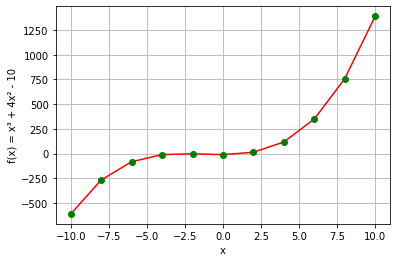

In [7]:
def gerarGrafico(f, a, b, d):
    
    x = []
    y = []
    while a <= b:
        x.append(a)
        y.append(f(a))
        a += d
        
    plt.plot(x, y, 'r')
    plt.plot(x, y, 'go')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('f(x) = x³ + 4x² - 10')
    plt.show()

gerarGrafico(funcao, -10, 10, 2)

**4 - Implemente uma função que receba f e uma tolerância (TOL), e retorne o tempo de processamento em milissegundos de cada um dos métodos; e o array com a sequência pn de aproximações da raíz.**

In [8]:
def tempoProcessamento(funcao, tol):
    
    t1 = t()
    metodoBissecao(funcao, 1, 2, tol, 20)
    print(f'Método da Bissecção:\nTempo: {t() - t1}')
    print(metodoBissecaoA)
    t1 = t()
    metodoNewton(funcao, 1, tol, 20)
    print(f'\nMétodo de Newton:\nTempo: {t() - t1}')
    print(metodoNewtonA)
    t1 = t()
    metodoSecante(funcao, 1, 2, tol, 20)
    print(f'\nMétodo da Secante:\nTempo: {t() - t1}')
    print(metodoSecanteA)

tempoProcessamento(funcao, 10**-4)

Método da Bissecção:
Tempo: 1.9073486328125e-05
[1.5, 1.25, 1.375, 1.3125, 1.34375, 1.359375, 1.3671875, 1.36328125, 1.365234375, 1.3642578125, 1.36474609375, 1.364990234375, 1.3651123046875, 1.36517333984375, 1.5, 1.25, 1.375, 1.3125, 1.34375, 1.359375, 1.3671875, 1.36328125, 1.365234375, 1.3642578125, 1.36474609375, 1.364990234375, 1.3651123046875, 1.36517333984375]

Método de Newton:
Tempo: 1.2874603271484375e-05
[1.4545454545454546, 1.3689004010695187, 1.365236600202116, 1.3652300134353668, 1.4545454545454546, 1.3689004010695187, 1.365236600202116, 1.3652300134353668]

Método da Secante:
Tempo: 8.821487426757812e-06
[1.263157894736842, 1.3388278388278387, 1.3666163947193453, 1.3652119026318565, 1.3652300011108591, 1.263157894736842, 1.3388278388278387, 1.3666163947193453, 1.3652119026318565, 1.3652300011108591]


**5 - Combinando os resultados das questões 3 e 4, implemente um algoritmo
que plote o gráfico de y = f(x) junto com a sequência de pontos (pn, f(pn))
para cada um dos métodos. O gráfico deve ser uma curva poligonal (i.e. segmentos de reta conectados).**

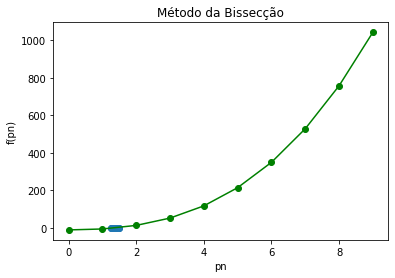

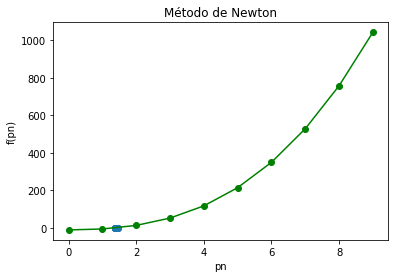

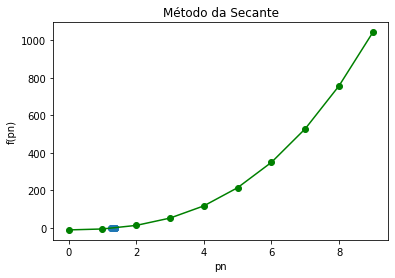

In [9]:
def gerarGrafico2(f, a, b):

    metodoBissecaoR = []
    metodoNewtonR = []
    metodoSecanteR = []
    funcaoGrafico = []

    for i in range(b-a):
        funcaoGrafico.append(f(i))
    for i in metodoBissecaoA:
        metodoBissecaoR.append(f(i))
    for i in metodoNewtonA:
        metodoNewtonR.append(f(i))
    for i in metodoSecanteA:
        metodoSecanteR.append(f(i))

    plt.scatter(metodoBissecaoA, metodoBissecaoR)
    plt.xlabel('pn')
    plt.ylabel('f(pn)')
    plt.title('Método da Bissecção')
    plt.plot(range(a,b),funcaoGrafico, color = 'green')
    plt.plot(range(a,b),funcaoGrafico, 'go')
    plt.show()

    plt.scatter(metodoNewtonA, metodoNewtonR)
    plt.xlabel('pn')
    plt.ylabel('f(pn)')
    plt.title('Método de Newton')
    plt.plot(range(a,b),funcaoGrafico, color = 'green')
    plt.plot(range(a,b),funcaoGrafico, 'go')
    plt.show()

    plt.scatter(metodoSecanteA, metodoSecanteR)
    plt.xlabel('pn')
    plt.ylabel('f(pn)')
    plt.title('Método da Secante')
    plt.plot(range(a,b),funcaoGrafico, color = 'green')
    plt.plot(range(a,b),funcaoGrafico, 'go')
    plt.show()
  
gerarGrafico2(funcao, 0, 10)

**6 - Implemente uma função que plote os gráficos y = t(x) de cada um dos
métodos (Bisecção, Newton e Secante), onde x é uma tolerância (TOL) dada de entrada a cada algoritmo, e t(x) é o tempo de processamento do algoritmo, quando a tolerância x é dada de entrada. Obs.: os gráficos devem ser representados por curvas poligonais em uma  ́unica figura, com o mesmo sistema de coordenadas.**

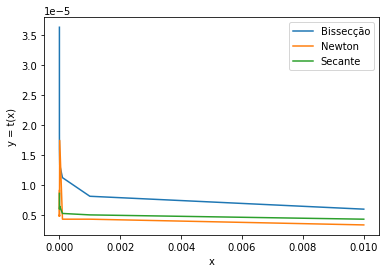

In [10]:
def gerarGrafico3(f, x):
    
    txBisseccao = []
    txNewton = []
    txSecante = []
    tolerancias = []
    tol = 10**-10

    while tol <= x:
        ti = t()
        metodoBissecao(f, 1, 2, tol, 100)
        txBisseccao.append(t() - ti)
        ti = t()
        metodoNewton(f, 1, tol, 100)
        txNewton.append(t() - ti)
        ti = t()
        metodoSecante(f, 1, 2, tol, 100)
        txSecante.append(t() - ti)
        tolerancias.append(tol)
        tol *= 10

    plt.plot(tolerancias, txBisseccao)
    plt.plot(tolerancias, txNewton)
    plt.plot(tolerancias, txSecante)
    plt.xlabel('x')
    plt.ylabel('y = t(x)')
    plt.legend(['Bissecção', 'Newton','Secante'])
    plt.show()

gerarGrafico3(funcao, 0.01)

**7 - Gere resultados de todas as questões acima para as seguintes equações,
variando a tolerância. Gerar resultado significa resolver a equação (com cada
método), plotar os gráficos da questão 5 (que dependem das questões 3 e 4),
e os gráficos da questão 6.**

In [11]:
def funcaoA(x):
    return math.exp(x) - 2 - math.cos(math.exp(x) - 2)

def funcaoB(x):
    return x**2 - 4*x + 4 - ln(x)

def funcaoC(x):
    return 2*x*math.cos(2*x)-(x+1)**2

def funcaoD(x):
    return x - 0.8 - 0.2*math.sin(x)

def funcaoE(x):
    return 25**(1/3) - x

def resolver(f, a, b, tol, n):
    metodoBissecao(f, a, b, tol, n)
    metodoNewton(f, (a+b)/2, tol, n)
    metodoSecante(f, a, b, tol, n)

    print(f'Tolerancia: {tol}\n')
    print(f'Método da Bissecção\nPonto: {metodoBissecaoA[len(metodoBissecaoA)-1]}\n')
    print(f'Método de Newton\nPonto: {metodoNewtonA[len(metodoNewtonA)-1]}\n')
    print(f'Método da Secante\nPonto: {metodoSecanteA[len(metodoSecanteA)-1]}\n')
    print('##### ##### ##### #####\n')

Tolerancia: 0.001

Método da Bissecção
Ponto: 1.0068359375

Método de Newton
Ponto: 1.006718800638163

Método da Secante
Ponto: 1.0076242009335215

##### ##### ##### #####

Tolerancia: 0.0001

Método da Bissecção
Ponto: 1.00762939453125

Método de Newton
Ponto: 1.0075163289294993

Método da Secante
Ponto: 1.0076242009335215

##### ##### ##### #####

Tolerancia: 1e-05

Método da Bissecção
Ponto: 1.0076217651367188

Método de Newton
Ponto: 1.0076111683600009

Método da Secante
Ponto: 1.0076239716383941

##### ##### ##### #####

Tolerancia: 1e-06

Método da Bissecção
Ponto: 1.007624626159668

Método de Newton
Ponto: 1.007623077311431

Método da Secante
Ponto: 1.0076239716383941

##### ##### ##### #####



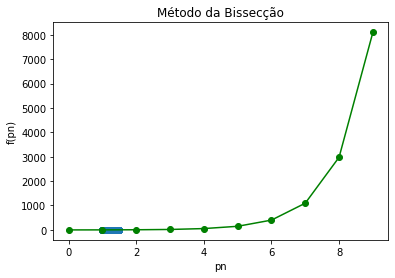

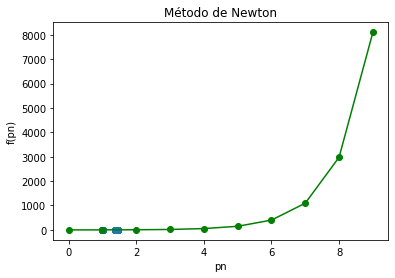

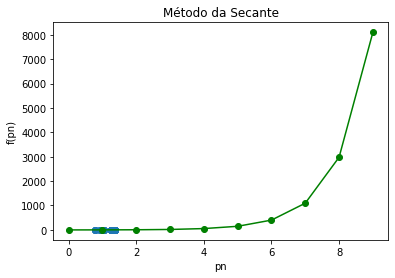

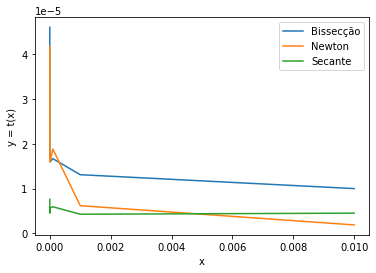

In [12]:
for i in range(3, 7):
    resolver(funcaoA, 0.5, 1.5, 10**-i, 100)

gerarGrafico2(funcaoA, 0, 10)
gerarGrafico3(funcaoA, 0.01)

Método falhou depois de 100 iterações.
Tolerancia: 0.001

Método da Bissecção
Ponto: 1.4130859375

Método de Newton
Ponto: 2.9494733217345446

Método da Secante
Ponto: 1.41239118275496

##### ##### ##### #####

Método falhou depois de 100 iterações.
Tolerancia: 0.0001

Método da Bissecção
Ponto: 1.41241455078125

Método de Newton
Ponto: 2.9494733217345446

Método da Secante
Ponto: 1.41239118275496

##### ##### ##### #####

Método falhou depois de 100 iterações.
Tolerancia: 1e-05

Método da Bissecção
Ponto: 1.4123916625976562

Método de Newton
Ponto: 2.9494733217345446

Método da Secante
Ponto: 1.412391172023977

##### ##### ##### #####

Método falhou depois de 100 iterações.
Tolerancia: 1e-06

Método da Bissecção
Ponto: 1.4123907089233398

Método de Newton
Ponto: 2.9494733217345446

Método da Secante
Ponto: 1.412391172023977

##### ##### ##### #####



/tmp/ipykernel_15011/1933123825.py:5: RuntimeWarning: divide by zero encountered in log
  return x**2 - 4*x + 4 - ln(x)


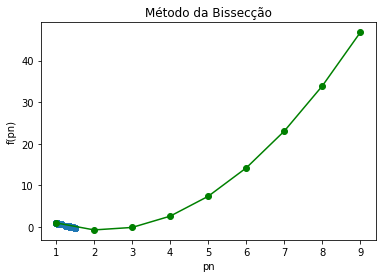

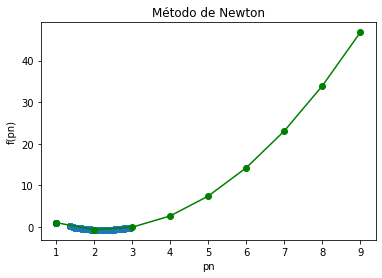

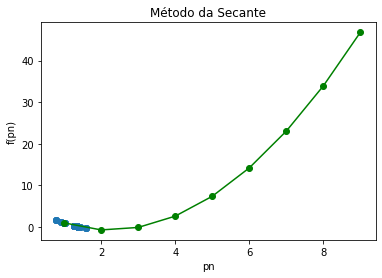

/tmp/ipykernel_15011/1933123825.py:5: RuntimeWarning: invalid value encountered in log
  return x**2 - 4*x + 4 - ln(x)


Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.


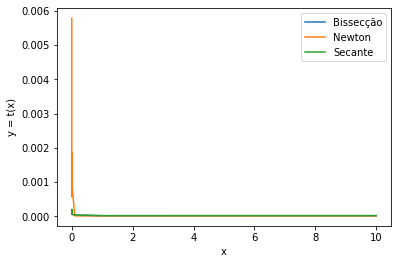

In [13]:
for i in range(3, 7):
    resolver(funcaoB, 1, 2, 10**-i, 100)

gerarGrafico2(funcaoB, 0, 10)
gerarGrafico3(funcaoB, 10)

Tolerancia: 1

Método da Bissecção
Ponto: -2.5

Método de Newton
Ponto: -5.029206529649723

Método da Secante
Ponto: -2.1419331747181767

##### ##### ##### #####

Método falhou depois de 100 iterações.
Tolerancia: 0.1

Método da Bissecção
Ponto: -2.1875

Método de Newton
Ponto: 32.51346149333667

Método da Secante
Ponto: -2.2012800280775195

##### ##### ##### #####

Método falhou depois de 100 iterações.
Tolerancia: 0.01

Método da Bissecção
Ponto: -2.1953125

Método de Newton
Ponto: 32.51346149333667

Método da Secante
Ponto: -2.1913050605596935

##### ##### ##### #####

Método falhou depois de 100 iterações.
Tolerancia: 0.001

Método da Bissecção
Ponto: -2.1904296875

Método de Newton
Ponto: 32.51346149333667

Método da Secante
Ponto: -2.1913050605596935

##### ##### ##### #####

Método falhou depois de 100 iterações.
Tolerancia: 0.0001

Método da Bissecção
Ponto: -2.19134521484375

Método de Newton
Ponto: 32.51346149333667

Método da Secante
Ponto: -2.1913080126822

##### ##### ####

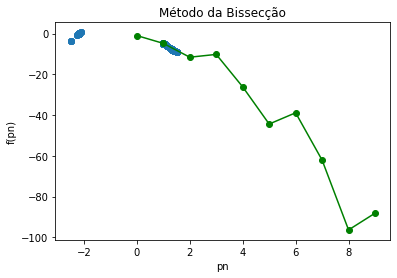

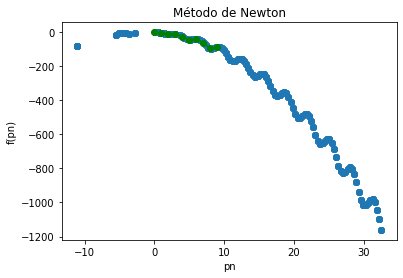

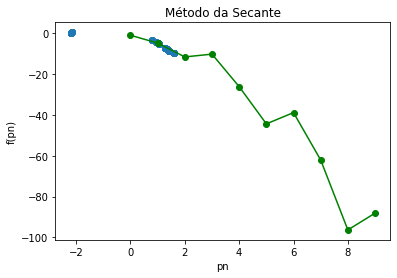

Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.


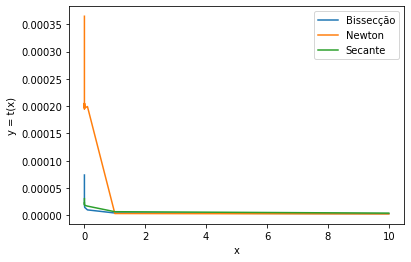

In [14]:
for i in range(5):
    resolver(funcaoC, -3, -2, 10**-i, 100)

gerarGrafico2(funcaoC, 0, 10)
gerarGrafico3(funcaoC, 10)

Tolerancia: 1

Método da Bissecção
Ponto: 0.7853981633974483

Método de Newton
Ponto: 0.8045803928551593

Método da Secante
Ponto: 0.9167204761732191

##### ##### ##### #####

Tolerancia: 0.1

Método da Bissecção
Ponto: 0.8835729338221293

Método de Newton
Ponto: 0.8045803928551593

Método da Secante
Ponto: 0.9615513263828518

##### ##### ##### #####

Tolerancia: 0.01

Método da Bissecção
Ponto: 0.9633399347921827

Método de Newton
Ponto: 0.8789970631750577

Método da Secante
Ponto: 0.9643460851039055

##### ##### ##### #####

Tolerancia: 0.001

Método da Bissecção
Ponto: 0.9641069251861255

Método de Newton
Ponto: 0.9541567084321917

Método da Secante
Ponto: 0.964333884548886

##### ##### ##### #####

Tolerancia: 0.0001

Método da Bissecção
Ponto: 0.964394546583854

Método de Newton
Ponto: 0.9633168142227

Método da Secante
Ponto: 0.964333884548886

##### ##### ##### #####



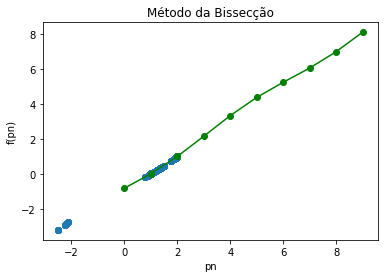

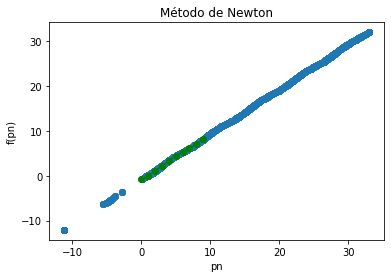

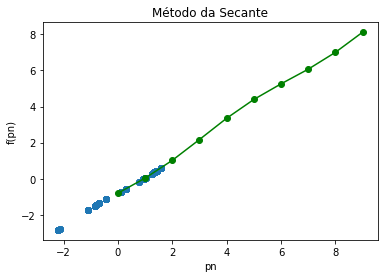

Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.


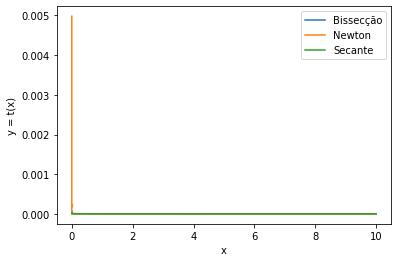

In [15]:
for i in range(5):
    resolver(funcaoD, 0, math.pi/2, 10**-i, 100)

gerarGrafico2(funcaoD, 0, 10)
gerarGrafico3(funcaoD, 10)

Tolerancia: 1

Método da Bissecção
Ponto: 2.5

Método de Newton
Ponto: 3.001489848270336

Método da Secante
Ponto: 2.924017738212866

##### ##### ##### #####

Tolerancia: 0.1

Método da Bissecção
Ponto: 2.9375

Método de Newton
Ponto: 3.001489848270336

Método da Secante
Ponto: 2.924017738212866

##### ##### ##### #####

Tolerancia: 0.01

Método da Bissecção
Ponto: 2.9296875

Método de Newton
Ponto: 3.001489848270336

Método da Secante
Ponto: 2.924017738212866

##### ##### ##### #####

Método falhou depois de 100 iterações.
Tolerancia: 0.001

Método da Bissecção
Ponto: 2.9248046875

Método de Newton
Ponto: 3.389740917803481

Método da Secante
Ponto: 2.924017738212866

##### ##### ##### #####

Método falhou depois de 100 iterações.
Tolerancia: 0.0001

Método da Bissecção
Ponto: 2.92401123046875

Método de Newton
Ponto: 3.389740917803481

Método da Secante
Ponto: 2.924017738212866

##### ##### ##### #####



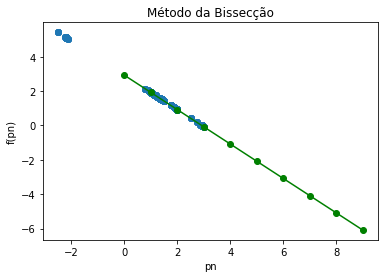

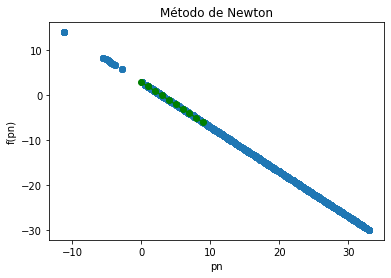

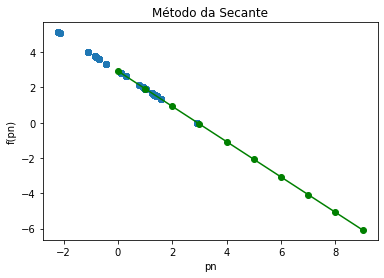

Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.
Método falhou depois de 100 iterações.


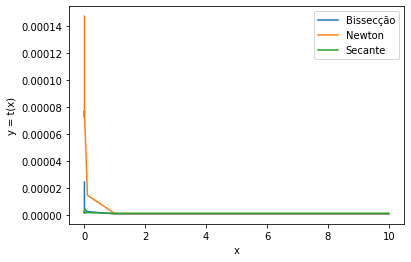

In [16]:
for i in range(5):
    resolver(funcaoE, 2, 4, 10**-i, 100)

gerarGrafico2(funcaoE, 0, 10)
gerarGrafico3(funcaoE, 10)